In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv('data/train.csv')

In [3]:
k=10
cols=df_train.corr().nlargest(k,'SalePrice')['SalePrice'].index

In [4]:
data=df_train[cols]
X_train=data.values
y_train=np.log1p(data.pop('SalePrice'))

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
N_estimators=[20,50,100,150,200,250,300,350,400,450,500]
test_scores=[]
for N in N_estimators:
    clf=RandomForestRegressor(n_estimators=N,max_features=0.3)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Alpha vs cv Error')

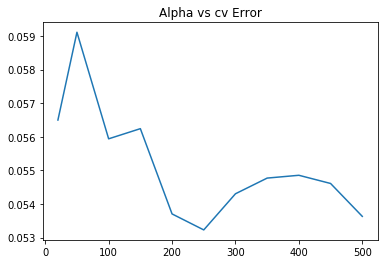

In [6]:
plot.plot(N_estimators,test_scores)
plot.title('Alpha vs cv Error')


In [7]:
rf=clf=RandomForestRegressor(n_estimators=350,max_features=0.3)

In [12]:
model=rf.fit(X_train,y_train)

In [13]:
test_score=rf.score(X_train,y_train)
print(test_score)

0.9977706581576461
